In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('results/Pokemon Classifier Color Accuracy Results.csv')
df.head()

,Model,Convolution Layers,Layer Size,Dense Layers,Training Loss,Training Accuracy,Validation Loss,Validation Accuracy,Testing Accuracy
0,2-conv-128-nodes-1-dense,2,128,1,0.0220,0.9921,1.7179,0.6588,71.23
1,2-conv-128-nodes-2-dense,2,128,2,0.0172,0.9921,2.2160,0.6404,70.75
2,2-conv-64-nodes-0-dense,2,64,0,0.0550,0.9915,2.1513,0.6483,69.34
3,2-conv-64-nodes-1-dense,2,64,1,0.0273,0.9921,1.7455,0.6325,68.87
4,2-conv-64-nodes-2-dense,2,64,2,0.2070,0.9921,1.5838,0.6378,67.92


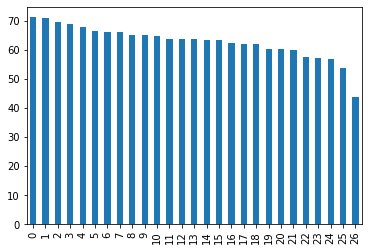

In [4]:
2_convs = 